In [3]:
import pandas as pd
import glob
import os 
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns

#### Merging all csv 

In [2]:
files = os.path.join(r'C:\Users\Dell\Desktop\Sales_Data','Sales*.csv')

In [3]:
files = glob.glob(files)

In [4]:
print(files)

['C:\\Users\\Dell\\Desktop\\Sales_Data\\Sales_April_2019.csv', 'C:\\Users\\Dell\\Desktop\\Sales_Data\\Sales_August_2019.csv', 'C:\\Users\\Dell\\Desktop\\Sales_Data\\Sales_December_2019.csv', 'C:\\Users\\Dell\\Desktop\\Sales_Data\\Sales_February_2019.csv', 'C:\\Users\\Dell\\Desktop\\Sales_Data\\Sales_January_2019.csv', 'C:\\Users\\Dell\\Desktop\\Sales_Data\\Sales_July_2019.csv', 'C:\\Users\\Dell\\Desktop\\Sales_Data\\Sales_June_2019.csv', 'C:\\Users\\Dell\\Desktop\\Sales_Data\\Sales_March_2019.csv', 'C:\\Users\\Dell\\Desktop\\Sales_Data\\Sales_May_2019.csv', 'C:\\Users\\Dell\\Desktop\\Sales_Data\\Sales_November_2019.csv', 'C:\\Users\\Dell\\Desktop\\Sales_Data\\Sales_October_2019.csv', 'C:\\Users\\Dell\\Desktop\\Sales_Data\\Sales_September_2019.csv']


In [5]:
all_month_data = pd.concat(map(pd.read_csv, files), ignore_index=True)

In [6]:
all_month_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Export to csv


In [4]:
all_month_data.to_csv('All_mounth_data.csv', index=False)

NameError: name 'all_month_data' is not defined

In [7]:
all_month_data=pd.read_csv(r'C:\Users\Dell\Desktop\Data_Analist\All_month_data.csv')

In [8]:
os.getcwd()

'C:\\Users\\Dell'

In [9]:
list(all_month_data.columns)

['Order ID',
 'Product',
 'Quantity Ordered',
 'Price Each',
 'Order Date',
 'Purchase Address']

In [10]:
all_month_data = all_month_data.rename(columns={'Order ID': 'Order_ID', 'Product': 'Product', 'Quantity Ordered': 'Quantity_Ordered', 'Price Each':'Price_Each', 'Order Date':'Order_Date', 'Purchase Address':'Purchase_Address'})

In [11]:
all_month_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Clean up the data

In [12]:
nf_df=all_month_data[all_month_data.isnull().any(axis=1)]
all_month_data=all_month_data.dropna()
all_month_data


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186845,259354,iPhone,1,700,09/01/2019 16:00,"216 Dogwood St, San Francisco, CA 94016"
186846,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186847,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Delete 'Or'

In [13]:
all_month_data['Month']=all_month_data['Order_Date'].str[0:2]


In [14]:
all_month_data=all_month_data[all_month_data['Month']!='Or']
all_month_data

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186845,259354,iPhone,1,700,09/01/2019 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186846,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186847,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [15]:
all_month_data['Month']=all_month_data['Month'].astype('int32')

In [16]:
all_month_data

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186845,259354,iPhone,1,700,09/01/2019 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186846,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186847,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


In [17]:
all_month_data['Quantity_Ordered']=pd.to_numeric(all_month_data['Quantity_Ordered'])
all_month_data['Price_Each']=pd.to_numeric(all_month_data['Price_Each'])

In [18]:
all_month_data['Price']=all_month_data['Quantity_Ordered']*all_month_data['Price_Each']


In [19]:
all_month_data

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Price
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186845,259354,iPhone,1,700.00,09/01/2019 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186846,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186847,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [20]:
result=all_month_data.groupby('Month', as_index=False).sum ().sort_values('Price', ascending=False)
result

,Month,Quantity_Ordered,Price_Each,Price
11,12,28114,4588415.41,4613443.34
9,10,22703,3715554.83,3736726.88
3,4,20558,3367671.02,3390670.24
10,11,19798,3180600.68,3199603.20
4,5,18667,3135125.13,3152606.75
2,3,17005,2791207.83,2807100.38
6,7,16072,2632539.56,2647775.76
5,6,15253,2562025.61,2577802.26
7,8,13448,2230345.42,2244467.88
1,2,13449,2188884.72,2202022.42


In [21]:

sns.set(rc={'figure.figsize':(11.7,8.27)})

<AxesSubplot:xlabel='Month', ylabel='Price'>

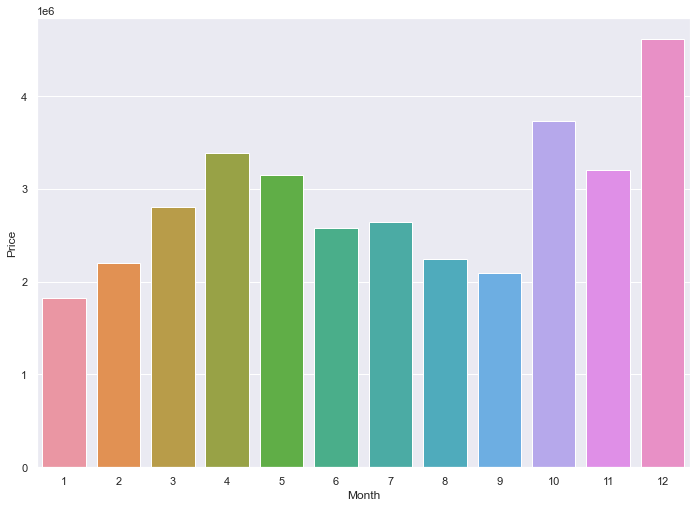

In [22]:
sns.barplot(data=result, x="Month", y="Price")

#### Which city has the hightest sales?

In [23]:
all_cities_data=all_month_data

In [24]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]
all_cities_data['City']=all_cities_data['Purchase_Address'].apply(lambda x:f'{get_city(x)} {get_state(x)}')

In [25]:
all_cities_data

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Price,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
2,176560,Google Phone,1,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
...,...,...,...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA
186845,259354,iPhone,1,700.00,09/01/2019 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA
186846,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA
186847,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA


In [26]:
cities=[city for city, df in all_cities_data.groupby('City')]

In [27]:
result_city=all_cities_data.groupby('City', as_index=False).sum ().sort_values('Price', ascending=False)
result_city

,City,Quantity_Ordered,Price_Each,Month,Price
8,San Francisco CA,50239,8211461.74,315520,8262203.91
4,Los Angeles CA,33289,5421435.23,208325,5452570.80
5,New York City NY,27932,4635370.83,175741,4664317.43
2,Boston MA,22528,3637409.77,141112,3661642.01
0,Atlanta GA,16602,2779908.20,104794,2795498.58
3,Dallas TX,16730,2752627.82,104620,2767975.40
9,Seattle WA,16553,2733296.01,104941,2747755.48
7,Portland OR,11303,1860558.22,70621,1870732.34
1,Austin TX,11153,1809873.61,69829,1819581.75
6,Portland ME,2750,447189.25,17144,449758.27


NameError: name 'plt' is not defined

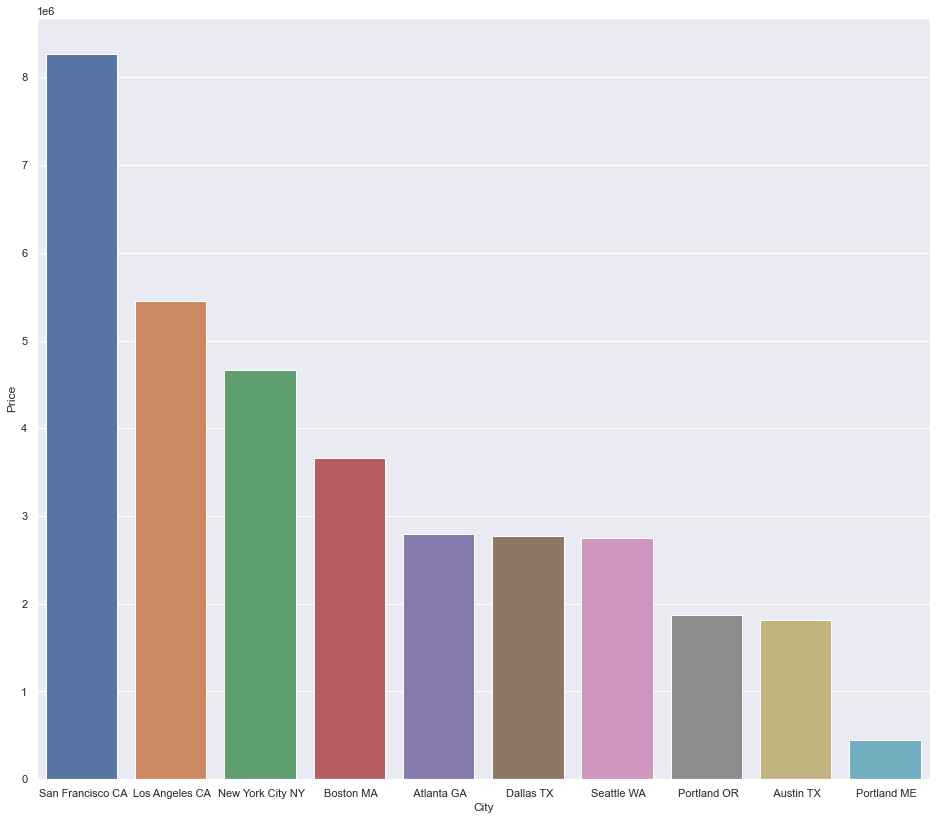

In [28]:
sns.set(rc={'figure.figsize':(16,14)})
sns.barplot(data=result_city, x='City', y='Price')
plt.xticks(rotation=70)
plt.tight_layout()


### What time should we display ads to maximize likelihood of customers

In [29]:
all_month_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Price,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
2,176560,Google Phone,1,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [30]:
all_month_data['Order_Date']= pd.to_datetime(all_month_data['Order_Date'])

In [31]:
all_month_data['Hour'] = all_month_data['Order_Date'].dt.hour
all_month_data['Minute'] = all_month_data['Order_Date'].dt.minute

In [32]:
all_month_data

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Price,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27
...,...,...,...,...,...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA,20,56
186845,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA,16,0
186846,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA,7,39
186847,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA,17,30


In [33]:
all_month_hour=[hour for hour, df in all_month_data.groupby('Hour')]

In [34]:
all_month_hour=all_month_data.groupby('Hour', as_index=False).count()

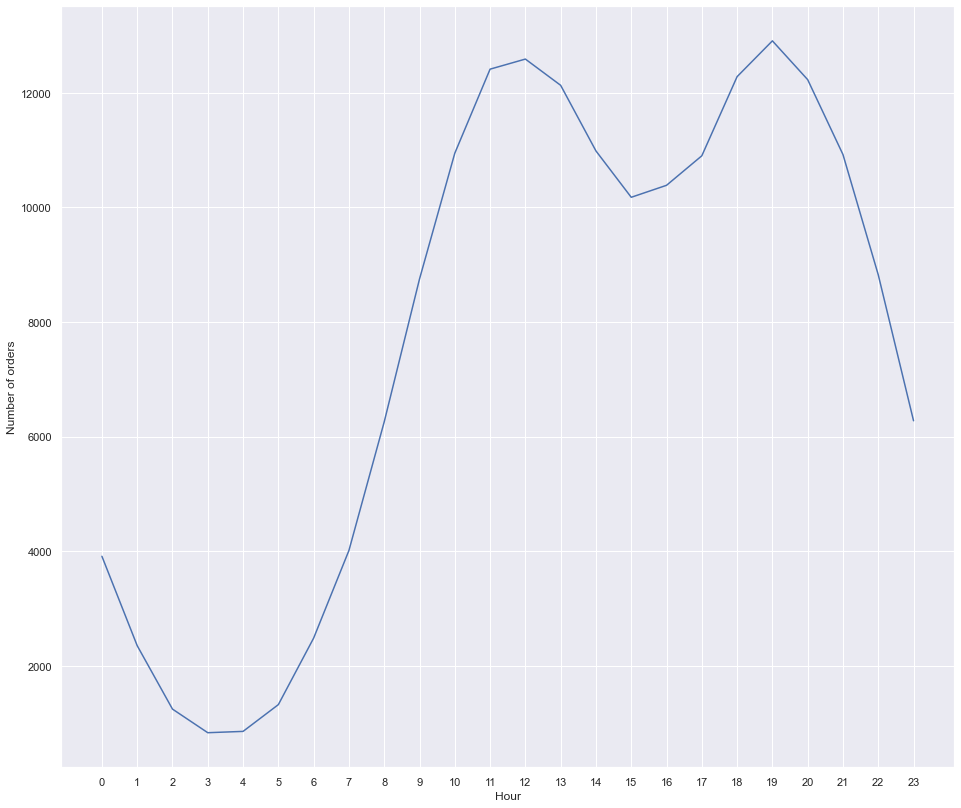

In [35]:
import matplotlib.pyplot as plt
g=sns.lineplot(data=all_month_hour, x='Hour', y='City')
plt.xlabel("Hour")
plt.ylabel("Number of orders")
g.set_xticks(range(24))

### As we see the most orders its 11am and 7pm 

## What products are most often sold together

In [36]:
df=all_month_data[all_month_data['Order_ID'].duplicated(keep=False)]

In [37]:
df['Grouped']=df.groupby('Order_ID')['Product'].transform(lambda x:(',').join(x))

In [38]:
df=df[['Grouped', 'Order_ID']].drop_duplicates()

In [39]:
df

,Grouped,Order_ID
2,"Google Phone,Wired Headphones",176560
17,"Google Phone,USB-C Charging Cable",176574
29,"Bose SoundSport Headphones,Bose SoundSport Hea...",176585
31,"AAA Batteries (4-pack),Google Phone",176586
118,"Lightning Charging Cable,USB-C Charging Cable",176672
...,...,...
186780,"Apple Airpods Headphones,Apple Airpods Headphones",259296
186782,"iPhone,Lightning Charging Cable,Lightning Char...",259297
186790,"34in Ultrawide Monitor,AA Batteries (4-pack)",259303
186802,"Wired Headphones,AAA Batteries (4-pack)",259314


In [40]:
from itertools import combinations
from collections import Counter 

In [41]:
count=Counter()

In [42]:
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2))) 
for item, value in count.most_common(10):
    print(item, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### What product sold the most???

In [43]:
all_month_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Price,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


In [51]:
product_ordered=all_month_data.groupby('Product', as_index=False)
quantity_ordered=product_ordered.sum()['Quantity_Ordered']

In [59]:
products= [product for product, df in product_ordered]

In [57]:
quantity_ordered.sort_values(ascending=True)

10      646
11      666
16     2068
0      4129
14     4130
13     4728
8      4819
9      5532
3      6199
1      6244
18     6849
2      7550
7     13457
6     15661
17    20557
12    23217
15    23975
4     27635
5     31017
Name: Quantity_Ordered, dtype: int64

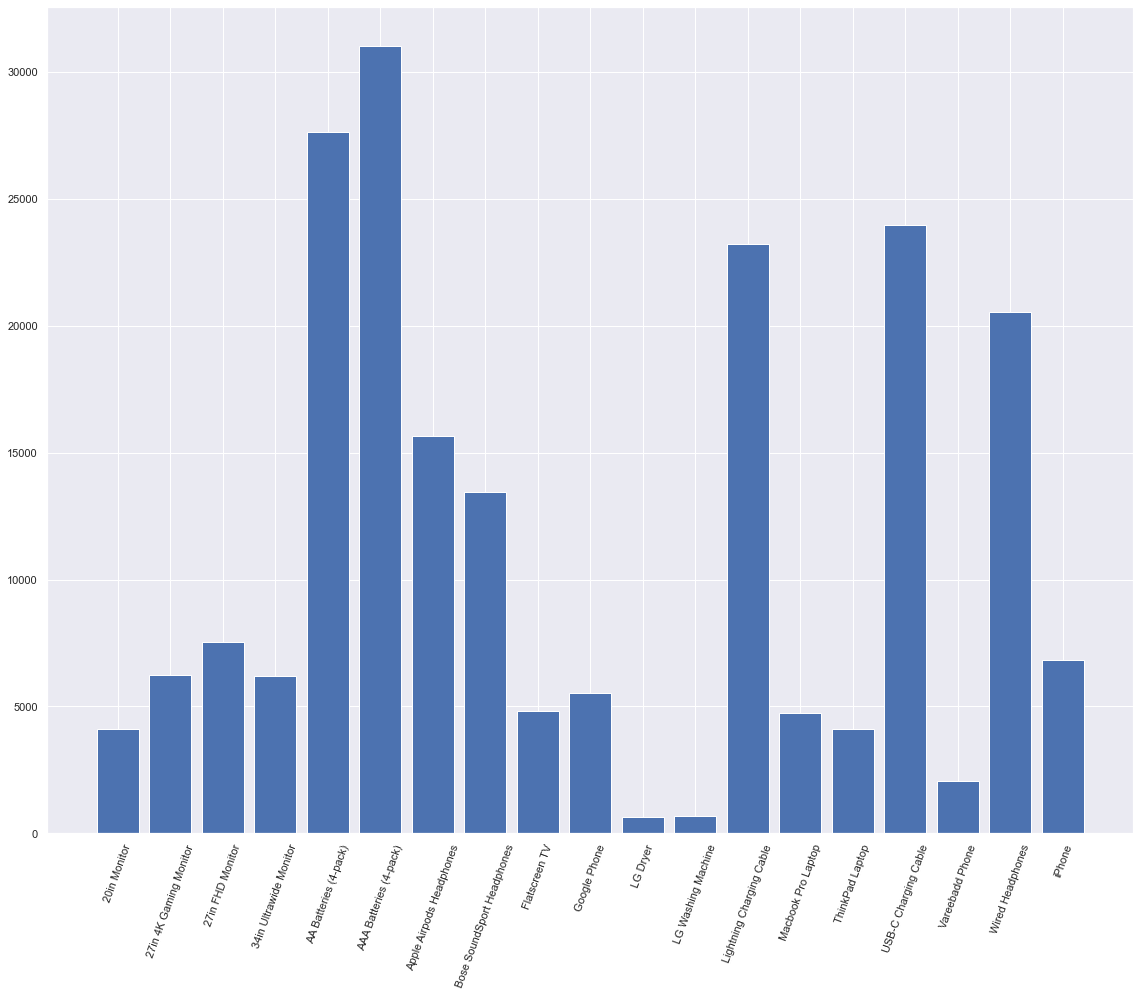

In [69]:
plt.bar(products, quantity_ordered)
plt.xticks(rotation=70)
plt.tight_layout()


In [62]:
mean_price=all_month_data.groupby('Product').mean()['Price_Each']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

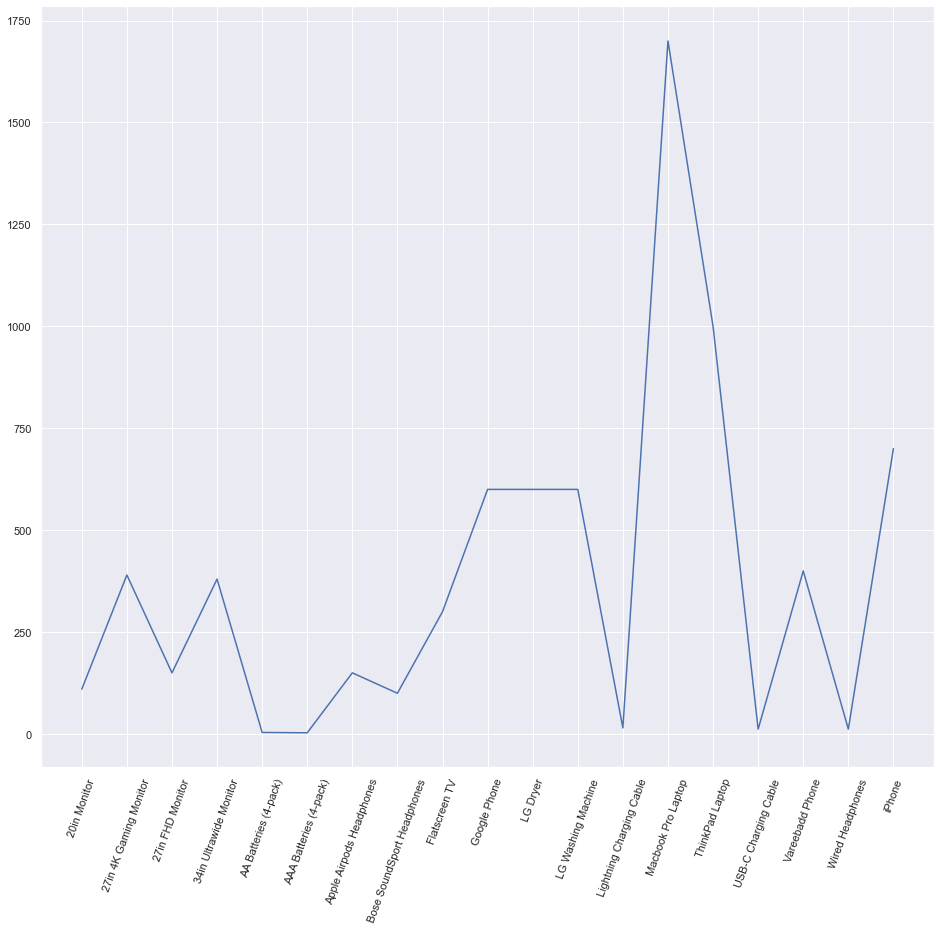

In [71]:
plt.plot(products, mean_price)
plt.xticks(rotation=70)

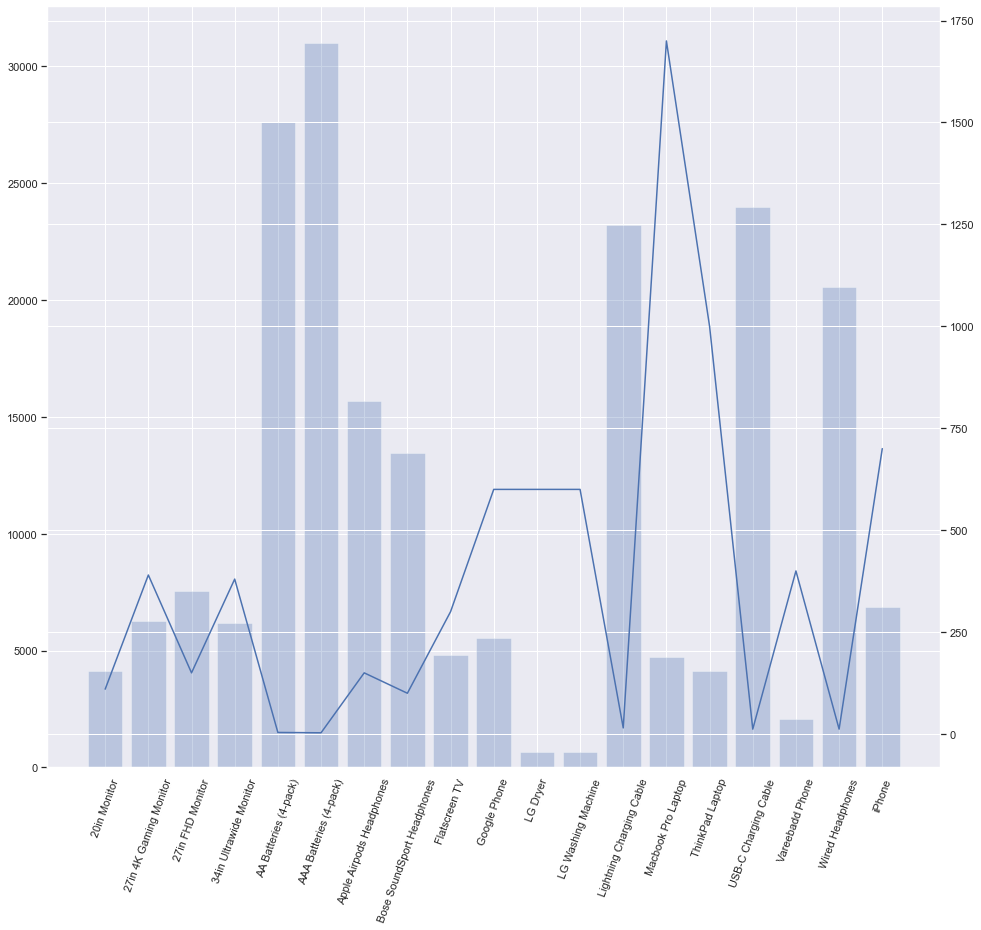

In [80]:
fig, ax1 = plt.subplots()
ax1.bar(products, quantity_ordered, alpha=0.3)
plt.xticks(rotation=70)
ax2 = ax1.twinx()
ax2.plot(products, mean_price)